Тут еще мой тг канал https://t.me/mikhaylovgleb

https://drive.google.com/file/d/1l4HUk-ZLF_xkFT8tEVQtOWWQGFW3QzK5/view?usp=sharing

In [1]:
! gdown --id 1l4HUk-ZLF_xkFT8tEVQtOWWQGFW3QzK5

Downloading...
From: https://drive.google.com/uc?id=1l4HUk-ZLF_xkFT8tEVQtOWWQGFW3QzK5
To: /content/bank-data-crash-course.csv
5.13MB [00:00, 16.3MB/s]


Задание
Вам предлагается набор данных, содержащий следующие переменные
Переменные, характеризующие кредитную историю клиента
closed_cred_sum - сумма, которую клиент выплатил по ранее взятым и закрытым
кредитам  
closed_creds - количество закрытых кредитов  
active_cred_sum_overdue - суммарная задолженность по активным кредитам  
active_cred_sum - сумма всех активных кредитов  
active_cred_day_overdue - суммарная просрочка в днях по всем активным кредитам  
active_cred_max_overdue - максимальная сумма просроченной задолженности по
активным кредитам  
Переменные характеризующие клиента  
age - возраст  
gender - пол  
region - регион  
month_income - ежемесячный доход  
Переменные, характеризующие кредит, по которому нужно сделать
прогноз  
first_loan - сумма, которую клиент хочет получить в кредит (из заявки)  
first_days_quant - срок, на которую клиент хочет взять кредит  
loan_cost_all - одобренная клиенту сумма кредита  
order_date - дата подачи заявки на получение кредита  
cost_all - сумма всех выплат по одобренному кредиту  
order_id - id заявки  
client_id - id клиента  
Целевая переменная:  
expert - решение, которое принято по заявке (0 - одобрено, 1 - отклонено)  
Необходимо на основе предоставленных данных построить модель для предсказания
целевой переменной. Сделать описание проделанных шагов  
● Анализ данных  
● Фильтрация  
● Преобразование переменных  
● Моделирование  
● Оценка качества модели  
Обоснование выбранной метрики качества.  

In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('/content/bank-data-crash-course.csv')

In [ ]:
snakeCase

In [6]:
df

,Unnamed: 0,Closed Cred Sum,Closed Creds,Active Cred Sum Overdue,Active Cred Sum,Active Cred Day Overdue,Active Cred Max Overdue,Age,Gender,Region,First Loan,Loan Cost All,First Days Quant,Month Income,Order Date,Cost All,Order Id,Client Id,Expert
0,0,143822.00,22,104.12,130068.80,8,756.09,31,0,36.0,10000.0,10000,196,NaN,2017-07-23,0.0,728319,320464,1
1,1,0.00,0,38151.93,46230.00,1492,38151.93,51,0,93.0,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,2,51356.00,2,3000.00,3000.00,8,3000.00,28,1,3.0,10000.0,10000,84,NaN,2017-07-23,0.0,728323,320467,1
3,3,0.00,0,22784.19,32103.52,913,22784.19,28,0,52.0,10000.0,10000,7,NaN,2017-07-23,0.0,728447,320533,1
4,4,12298.00,1,4942.95,4950.00,2883,4942.95,31,0,47.0,5000.0,5000,20,NaN,2017-07-23,0.0,728421,298598,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,49996,0.00,0,74662.61,79662.61,2593,42204.55,27,1,NaN,4000.0,4000,20,NaN,2017-08-13,0.0,759472,96091,1
49997,49997,21653.49,2,0.00,0.00,0,0.00,28,0,75.0,2000.0,2000,10,20000.0,2017-08-13,0.0,759475,338240,1
49998,49998,0.00,0,0.00,1000.00,0,941.00,22,0,NaN,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1
49999,49999,0.00,0,0.00,1000.00,0,941.00,22,0,NaN,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1


In [9]:
df = df.drop(['Unnamed: 0'], axis=1)

In [12]:
df.columns

Index(['Closed Cred Sum', 'Closed Creds', 'Active Cred Sum Overdue',
       'Active Cred Sum', 'Active Cred Day Overdue', 'Active Cred Max Overdue',
       'Age', 'Gender', 'Region', 'First Loan', 'Loan Cost All',
       'First Days Quant', 'Month Income', 'Order Date', 'Cost All',
       'Order Id', 'Client Id', 'Expert'],
      dtype='object')

In [13]:
df.columns = ['closed_cred_sum', 'Closed Creds', 'Active Cred Sum Overdue',
       'Active Cred Sum', 'Active Cred Day Overdue', 'Active Cred Max Overdue',
       'Age', 'Gender', 'Region', 'First Loan', 'Loan Cost All',
       'First Days Quant', 'Month Income', 'Order Date', 'Cost All',
       'Order Id', 'Client Id', 'Expert']

In [20]:
'gleb hleb'.replace(' ','_')

'gleb_hleb'

In [22]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [23]:
df

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.00,22,104.12,130068.80,8,756.09,31,0,36.0,10000.0,10000,196,NaN,2017-07-23,0.0,728319,320464,1
1,0.00,0,38151.93,46230.00,1492,38151.93,51,0,93.0,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.00,2,3000.00,3000.00,8,3000.00,28,1,3.0,10000.0,10000,84,NaN,2017-07-23,0.0,728323,320467,1
3,0.00,0,22784.19,32103.52,913,22784.19,28,0,52.0,10000.0,10000,7,NaN,2017-07-23,0.0,728447,320533,1
4,12298.00,1,4942.95,4950.00,2883,4942.95,31,0,47.0,5000.0,5000,20,NaN,2017-07-23,0.0,728421,298598,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,0.00,0,74662.61,79662.61,2593,42204.55,27,1,NaN,4000.0,4000,20,NaN,2017-08-13,0.0,759472,96091,1
49997,21653.49,2,0.00,0.00,0,0.00,28,0,75.0,2000.0,2000,10,20000.0,2017-08-13,0.0,759475,338240,1
49998,0.00,0,0.00,1000.00,0,941.00,22,0,NaN,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1
49999,0.00,0,0.00,1000.00,0,941.00,22,0,NaN,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   closed_cred_sum          50001 non-null  float64
 1   closed_creds             50001 non-null  int64  
 2   active_cred_sum_overdue  50001 non-null  float64
 3   active_cred_sum          50001 non-null  float64
 4   active_cred_day_overdue  50001 non-null  int64  
 5   active_cred_max_overdue  50001 non-null  float64
 6   age                      50001 non-null  int64  
 7   gender                   50001 non-null  int64  
 8   region                   29940 non-null  float64
 9   first_loan               49982 non-null  float64
 10  loan_cost_all            50001 non-null  int64  
 11  first_days_quant         50001 non-null  int64  
 12  month_income             34829 non-null  float64
 13  order_date               50001 non-null  object 
 14  cost_all              

In [24]:
df.isna().mean()

closed_cred_sum            0.000000
closed_creds               0.000000
active_cred_sum_overdue    0.000000
active_cred_sum            0.000000
active_cred_day_overdue    0.000000
active_cred_max_overdue    0.000000
age                        0.000000
gender                     0.000000
region                     0.401212
first_loan                 0.000380
loan_cost_all              0.000000
first_days_quant           0.000000
month_income               0.303434
order_date                 0.000000
cost_all                   0.000000
order_id                   0.000000
client_id                  0.000000
expert                     0.000000
dtype: float64

In [26]:
df

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.00,22,104.12,130068.80,8,756.09,31,0,36.0,10000.0,10000,196,NaN,2017-07-23,0.0,728319,320464,1
1,0.00,0,38151.93,46230.00,1492,38151.93,51,0,93.0,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.00,2,3000.00,3000.00,8,3000.00,28,1,3.0,10000.0,10000,84,NaN,2017-07-23,0.0,728323,320467,1
3,0.00,0,22784.19,32103.52,913,22784.19,28,0,52.0,10000.0,10000,7,NaN,2017-07-23,0.0,728447,320533,1
4,12298.00,1,4942.95,4950.00,2883,4942.95,31,0,47.0,5000.0,5000,20,NaN,2017-07-23,0.0,728421,298598,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,0.00,0,74662.61,79662.61,2593,42204.55,27,1,NaN,4000.0,4000,20,NaN,2017-08-13,0.0,759472,96091,1
49997,21653.49,2,0.00,0.00,0,0.00,28,0,75.0,2000.0,2000,10,20000.0,2017-08-13,0.0,759475,338240,1
49998,0.00,0,0.00,1000.00,0,941.00,22,0,NaN,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1
49999,0.00,0,0.00,1000.00,0,941.00,22,0,NaN,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1


In [27]:
[1,0,1]

[1, 0, 1]

In [28]:
(1 + 0 + 1) / 3

0.6666666666666666

In [29]:
df['expert'].mean()

0.749265014699706

In [30]:
df

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.00,22,104.12,130068.80,8,756.09,31,0,36.0,10000.0,10000,196,NaN,2017-07-23,0.0,728319,320464,1
1,0.00,0,38151.93,46230.00,1492,38151.93,51,0,93.0,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.00,2,3000.00,3000.00,8,3000.00,28,1,3.0,10000.0,10000,84,NaN,2017-07-23,0.0,728323,320467,1
3,0.00,0,22784.19,32103.52,913,22784.19,28,0,52.0,10000.0,10000,7,NaN,2017-07-23,0.0,728447,320533,1
4,12298.00,1,4942.95,4950.00,2883,4942.95,31,0,47.0,5000.0,5000,20,NaN,2017-07-23,0.0,728421,298598,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,0.00,0,74662.61,79662.61,2593,42204.55,27,1,NaN,4000.0,4000,20,NaN,2017-08-13,0.0,759472,96091,1
49997,21653.49,2,0.00,0.00,0,0.00,28,0,75.0,2000.0,2000,10,20000.0,2017-08-13,0.0,759475,338240,1
49998,0.00,0,0.00,1000.00,0,941.00,22,0,NaN,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1
49999,0.00,0,0.00,1000.00,0,941.00,22,0,NaN,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1


In [53]:
df.groupby('gender')['expert'].agg(['count','sum','mean'])

,count,sum,mean
gender,,,
0,26866,19822,0.737810
1,23135,17642,0.762568


Процент одобрения у женщин выше. https://www.evanmiller.org/ab-testing/chi-squared.html#!19822/26866;17642/23135@95


In [34]:
df.pivot_table(index='gender',values='expert',aggfunc=['count','mean'])

,count,mean
,expert,expert
gender,,
0,26866,0.737810
1,23135,0.762568


In [38]:
df.pivot_table(index='region',columns='gender',values='expert',aggfunc=['count','mean']).reset_index()

region count           mean          
gender            0    1         0         1
0         1.0   105  128  0.895238  0.851562
1         2.0    68   66  0.911765  0.818182
2         3.0   596  539  0.852349  0.831169
3         4.0   164  205  0.932927  0.887805
4         5.0    91  111  0.846154  0.837838
..        ...   ...  ...       ...       ...
93       95.0    18   26  0.944444  0.923077
94       96.0    20    1  0.850000  1.000000
95       97.0    64   48  0.765625  0.895833
96       98.0    53   56  0.792453  0.875000
97       99.0    13    7  0.923077  0.857143

[98 rows x 5 columns]

In [41]:
len(df)

50001

In [43]:
df.groupby('region',dropna=False)['gender'].count()

region
1.0       233
2.0       134
3.0      1135
4.0       369
5.0       202
        ...  
96.0       21
97.0      112
98.0      109
99.0       20
NaN     20061
Name: gender, Length: 99, dtype: int64

In [45]:
df.groupby('region',dropna=False)['gender'].count().sum()

50001

In [47]:
t = df.pivot_table(index='region',values='expert',aggfunc=['count']).reset_index()

In [50]:
t['count']['expert'].sum()

29940

In [51]:
df.isna().mean()

closed_cred_sum            0.000000
closed_creds               0.000000
active_cred_sum_overdue    0.000000
active_cred_sum            0.000000
active_cred_day_overdue    0.000000
active_cred_max_overdue    0.000000
age                        0.000000
gender                     0.000000
region                     0.401212
first_loan                 0.000380
loan_cost_all              0.000000
first_days_quant           0.000000
month_income               0.303434
order_date                 0.000000
cost_all                   0.000000
order_id                   0.000000
client_id                  0.000000
expert                     0.000000
dtype: float64

In [52]:
df['region'].value_counts()

40.0    4185
36.0    1921
75.0    1778
65.0    1614
80.0    1463
        ... 
48.0      19
85.0      17
43.0      16
21.0      11
9.0        7
Name: region, Length: 98, dtype: int64

In [54]:
df

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.00,22,104.12,130068.80,8,756.09,31,0,36.0,10000.0,10000,196,NaN,2017-07-23,0.0,728319,320464,1
1,0.00,0,38151.93,46230.00,1492,38151.93,51,0,93.0,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.00,2,3000.00,3000.00,8,3000.00,28,1,3.0,10000.0,10000,84,NaN,2017-07-23,0.0,728323,320467,1
3,0.00,0,22784.19,32103.52,913,22784.19,28,0,52.0,10000.0,10000,7,NaN,2017-07-23,0.0,728447,320533,1
4,12298.00,1,4942.95,4950.00,2883,4942.95,31,0,47.0,5000.0,5000,20,NaN,2017-07-23,0.0,728421,298598,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,0.00,0,74662.61,79662.61,2593,42204.55,27,1,NaN,4000.0,4000,20,NaN,2017-08-13,0.0,759472,96091,1
49997,21653.49,2,0.00,0.00,0,0.00,28,0,75.0,2000.0,2000,10,20000.0,2017-08-13,0.0,759475,338240,1
49998,0.00,0,0.00,1000.00,0,941.00,22,0,NaN,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1
49999,0.00,0,0.00,1000.00,0,941.00,22,0,NaN,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1


In [60]:
len(df[df['month_income'] <= 200000]) / len(df)

0.6964860702785944

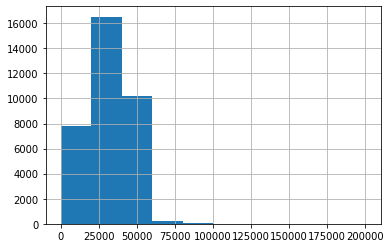

In [62]:
df[df['month_income'] <= 200000]['month_income'].hist()

In [63]:
df['month_income'].describe()

count     34829.000000
mean      35809.098036
std       14941.407679
min          18.000000
25%       25000.000000
50%       35000.000000
75%       50000.000000
max      550000.000000
Name: month_income, dtype: float64

In [64]:
t = pd.DataFrame({'salary':[40,30,40,60,70]})

In [65]:
t

,salary
0,40
1,30
2,40
3,60
4,70


In [66]:
t['salary'].mean()

48.0

In [67]:
t = pd.DataFrame({'salary':[40,30,40,60,70,10000000000]})

In [68]:
t['salary'].mean()

1666666706.6666667

In [69]:
t['salary'].median()

50.0

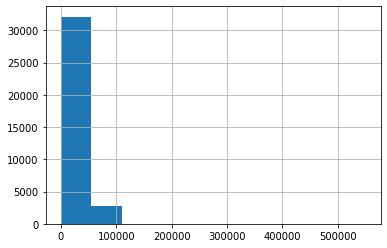

In [58]:
df['month_income'].hist()

In [76]:
df['income_cut1'] = pd.cut(df['month_income'],5)

In [77]:
df.groupby('income_cut1',dropna=False)['expert'].agg(['count','mean'])

,count,mean
income_cut1,,
"(-531.982, 110014.4]",34785,0.668593
"(110014.4, 220010.8]",40,0.325000
"(220010.8, 330007.2]",1,1.000000
"(330007.2, 440003.6]",1,1.000000
"(440003.6, 550000.0]",2,0.500000


In [79]:
df['income_cut2'] = pd.qcut(df['month_income'],6,duplicates='drop')

In [80]:
df.groupby('income_cut2',dropna=False)['expert'].agg(['count','mean'])

,count,mean
income_cut2,,
"(17.999, 20000.0]",7800,0.722949
"(20000.0, 35000.0]",15817,0.684896
"(35000.0, 50000.0]",8401,0.601476
"(50000.0, 550000.0]",2811,0.621843


In [82]:
df['month_income'].value_counts()

35000.0    12148
50000.0     7297
20000.0     5089
60000.0     2414
25000.0     2207
           ...  
12750.0        1
35600.0        1
98000.0        1
12870.0        1
18.0           1
Name: month_income, Length: 246, dtype: int64

In [85]:
10000000000000000 > np.inf

False

In [86]:
df['income_cut3'] = pd.cut(df['month_income'],[0,10000,20000,30000,40000,50000,np.inf])

In [87]:
df.groupby('income_cut3',dropna=False)['expert'].agg(['count','mean'])

,count,mean
income_cut3,,
"(0.0, 10000.0]",1179,0.596268
"(10000.0, 20000.0]",6621,0.745507
"(20000.0, 30000.0]",3543,0.410951
"(30000.0, 40000.0]",12976,0.737438
"(40000.0, 50000.0]",7699,0.631381
"(50000.0, inf]",2811,0.621843


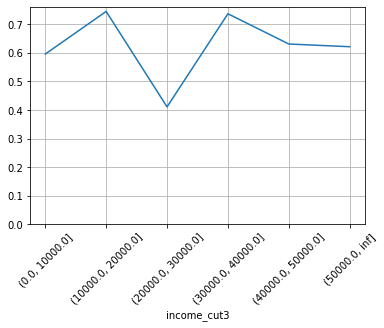

In [93]:
df.groupby('income_cut3',dropna=False)['expert'].mean().plot(ylim=0,rot=45,grid=True)

In [95]:
df.groupby('gender')['expert'].mean()

gender
0    0.737810
1    0.762568
Name: expert, dtype: float64

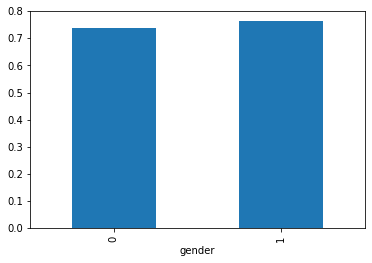

In [94]:
df.groupby('gender')['expert'].mean().plot(kind='bar')

In [96]:
df

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert,income_cut1,income_cut2,income_cut3
0,143822.00,22,104.12,130068.80,8,756.09,31,0,36.0,10000.0,10000,196,NaN,2017-07-23,0.0,728319,320464,1,NaN,NaN,NaN
1,0.00,0,38151.93,46230.00,1492,38151.93,51,0,93.0,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1,"(-531.982, 110014.4]","(17.999, 20000.0]","(10000.0, 20000.0]"
2,51356.00,2,3000.00,3000.00,8,3000.00,28,1,3.0,10000.0,10000,84,NaN,2017-07-23,0.0,728323,320467,1,NaN,NaN,NaN
3,0.00,0,22784.19,32103.52,913,22784.19,28,0,52.0,10000.0,10000,7,NaN,2017-07-23,0.0,728447,320533,1,NaN,NaN,NaN
4,12298.00,1,4942.95,4950.00,2883,4942.95,31,0,47.0,5000.0,5000,20,NaN,2017-07-23,0.0,728421,298598,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,0.00,0,74662.61,79662.61,2593,42204.55,27,1,NaN,4000.0,4000,20,NaN,2017-08-13,0.0,759472,96091,1,NaN,NaN,NaN
49997,21653.49,2,0.00,0.00,0,0.00,28,0,75.0,2000.0,2000,10,20000.0,2017-08-13,0.0,759475,338240,1,"(-531.982, 110014.4]","(17.999, 20000.0]","(10000.0, 20000.0]"
49998,0.00,0,0.00,1000.00,0,941.00,22,0,NaN,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1,"(-531.982, 110014.4]","(20000.0, 35000.0]","(30000.0, 40000.0]"
49999,0.00,0,0.00,1000.00,0,941.00,22,0,NaN,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1,"(-531.982, 110014.4]","(20000.0, 35000.0]","(30000.0, 40000.0]"


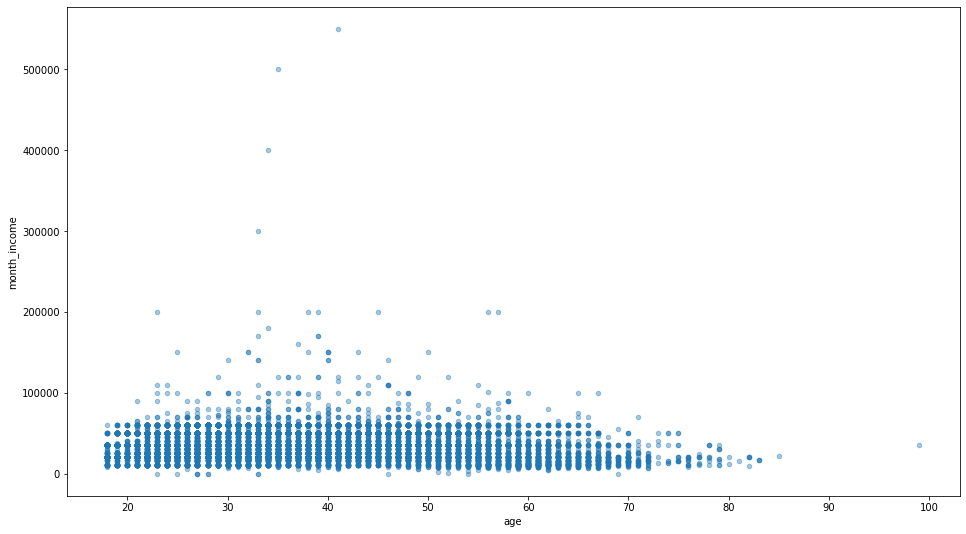

In [108]:
df.plot(x='age',y='month_income',kind='scatter',figsize=(16,9),alpha=0.4)

In [102]:
df['age_group'] = pd.qcut(df['age'],5)

In [103]:
df.groupby('age_group')['month_income'].agg(['count','mean','median'])

,count,mean,median
age_group,,,
"(17.999, 26.0]",8661,34160.506812,35000.0
"(26.0, 30.0]",6552,37144.971764,35000.0
"(30.0, 35.0]",6549,38102.960910,35000.0
"(35.0, 43.0]",6216,37684.427284,35000.0
"(43.0, 99.0]",6851,32721.410013,35000.0


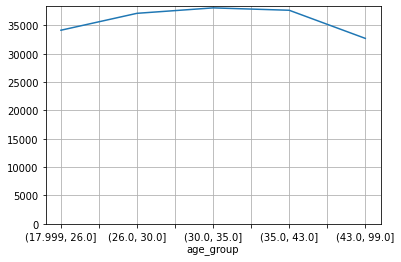

In [106]:
df.groupby('age_group')['month_income'].mean().plot(ylim=0,grid=True)